In [153]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score

In [130]:
df=pd.read_csv("Titanic dataset.csv")

In [131]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [132]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [133]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [134]:
mean_age = df['Age'].mean()
df['Age'] = df['Age'].fillna(mean_age)

The age column have 19% missing values usually we have to drop that feature because 20% missing values doesn't effect the data set but here in Task it is asked to work with age column so I'm filling it with median values

In [142]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

In [143]:
numerics = ['Fare', 'Age']

In [121]:
sex_mappings = dict(zip(df['Sex'], le.classes_))
emb_mappings = dict(zip(df['Embarked'], le.classes_))

In [144]:
for feature in numerics:

    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1

In [145]:
lower = max(df[feature].min(), Q1 - 1.5 * IQR)
upper = min(df[feature].max(), Q3 + 1.5 * IQR)

In [125]:
df.loc[df[feature] < lower, feature] = lower
df.loc[df[feature] > upper, feature] = upper

In [137]:
df['Sex'] = df['Sex'].map(sex_mappings)
df['Embarked'] = df['Embarked'].map(emb_mappings)

In [146]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df[numerics] = scaler.fit_transform(df[numerics])

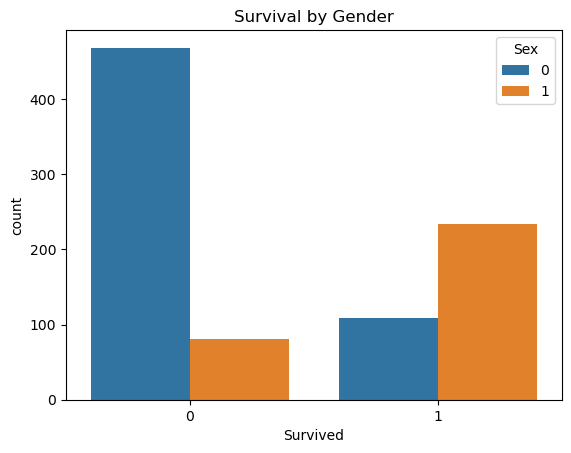

In [147]:
# Visualize survival rate by gender
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival by Gender')
plt.show()

with 0 and 1 on the y-axis, it appears the 'Survived' column, which contains binary values for whether each passenger survived (1) or did not survive (0). we can see that female survived count is more as compared to men and also not survived count says that most of the men are not survived
Here male is blue that is 0 and female is orange that is 1

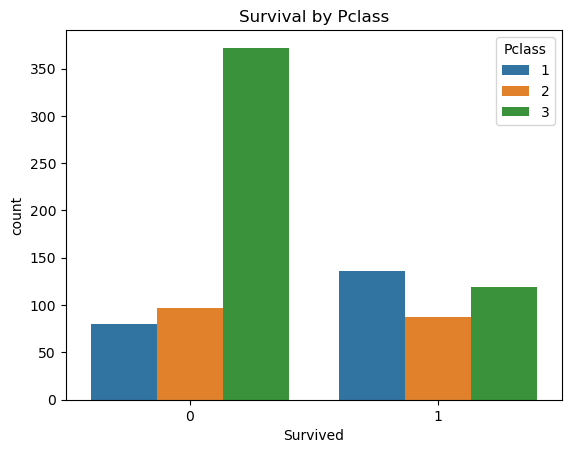

In [139]:
# Visualize survival rate by passenger class
sns.countplot(x='Survived', hue='Pclass', data=df) 
plt.title('Survival by Pclass')
plt.show()

from the above plot we can see that Pclass1 passengers survived more in number followed by Plcass3
and also Pclass3 passengers are alot in number in unsurvived list 

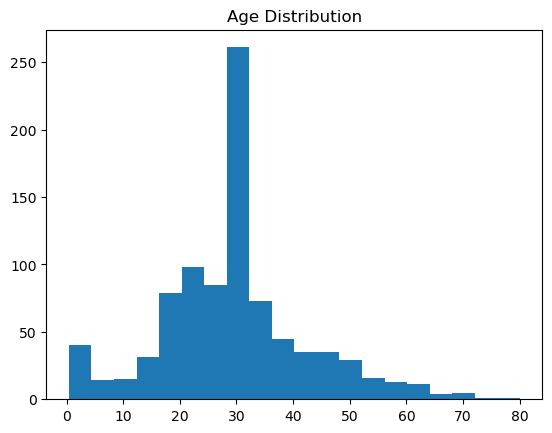

In [140]:
# Visualize age distribution
plt.hist(df['Age'].dropna(), bins=20)
plt.title('Age Distribution')
plt.show()

The distribution is right-skewed, with the most passengers in the younger age ranges. There is a peak around age 30, indicating a large number of passengers on board were in their 30s. The peak at 30 and skew towards younger ages suggests a demographic of mostly younger adult passengers. Elders above age 60 were relatively rare on board. In summary, the large spike at 30 tells us a lot of passengers were in their 30s. We should analyze age-based survival rates and see if being 30 impacted chances of survival versus being younger or older. The distribution gives insight into the passenger demographic on board.

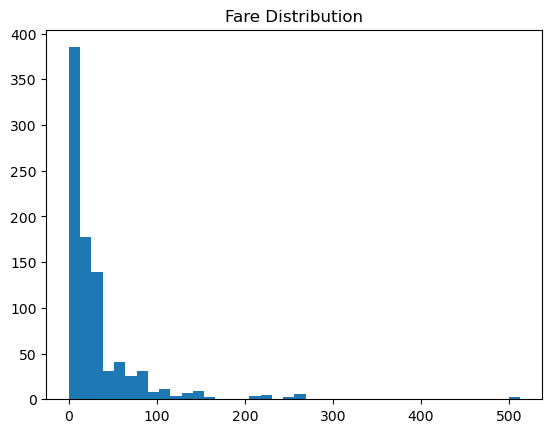

In [141]:
# Visualize fare distribution
plt.hist(df['Fare'], bins=40)
plt.title('Fare Distribution')
plt.show()

we can see that there are lot of passangers who were travelled with less ticket fare 
so we have to analyze weather fare price impacted chances of survival.

In [148]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1 

In [149]:
fare_scaler = MinMaxScaler()
df['Fare'] = fare_scaler.fit_transform(df[['Fare']].values)

In [150]:
# Split data
X = df.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [151]:
# Model training
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)  

LogisticRegression()

In [154]:
# Evaluation
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8208955223880597


In [156]:
from sklearn.inspection import permutation_importance

In [158]:
# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [160]:
# Permutation importance
baseline = model.score(X_test, y_test)
results = permutation_importance(model, X_test, y_test, scoring='accuracy') 


In [161]:
# Logistic regression coefficients
coefs = pd.Series(model.coef_[0], index=X.columns)

In [165]:
feature_names = X_train.columns

<BarContainer object of 8 artists>

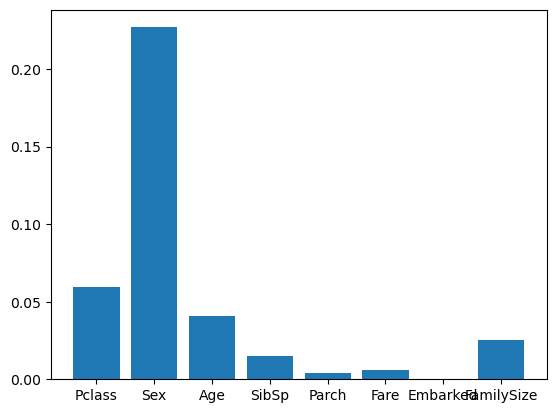

In [166]:
# Plot importances
plt.bar(feature_names, importances)

In [163]:
# Get coefficients
coefs = pd.Series(model.coef_[0], index=X.columns)

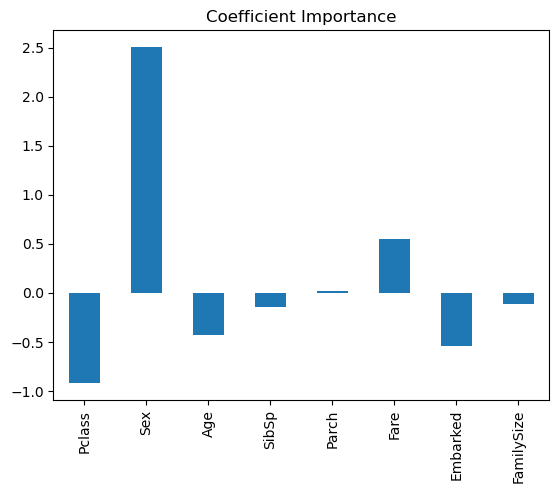

In [164]:
# Plot coefficients
coefs.plot(kind='bar')
plt.title('Coefficient Importance')
plt.show()

-Being female, higher class ticket, younger adult age, smaller family size, and stern cabins increased chances of survival

-Sex and Pclass were the top factors, indicating gender and socioeconomic status played major roles

-Model feature analysis helped quantify importance of various attributes on survival

Framed survival status prediction as a binary classification problem

Built a logistic regression classifier to discriminate between survival outcomes

Evaluated its accuracy in making these predictions

Used feature importance to understand key factors in survival